<a href="https://colab.research.google.com/github/Aryanupadhyay23/Deep-Learning-/blob/main/cnn_cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import kagglehub
path = kagglehub.dataset_download("princelv84/dogsvscats")

Using Colab cache for faster access to the 'dogsvscats' dataset.


In [115]:
path

'/kaggle/input/dogsvscats'

In [116]:
import os
os.listdir(path)

['test', 'train']

In [117]:
os.listdir(f"{path}/train")

['dogs', 'cats']

In [118]:
"""
import shutil
import os

src = "/kaggle/input/dogsvscats"
dst = "/content/dogsvscats"

# Remove destination if it already exists (avoids errors)
if os.path.exists(dst):
    shutil.rmtree(dst)

shutil.copytree(src, dst)

"""

'\nimport shutil\nimport os\n\nsrc = "/kaggle/input/dogsvscats"\ndst = "/content/dogsvscats"\n\n# Remove destination if it already exists (avoids errors)\nif os.path.exists(dst):\n    shutil.rmtree(dst)\n\nshutil.copytree(src, dst)\n'

In [147]:
# !pip install tensorflow numpy matplotlib keras

In [148]:
# !pip install opencv-python

In [121]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import cv2

from PIL import Image

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator,
    load_img,
    img_to_array
)

from keras.utils import plot_model

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)


In [122]:
cats_directory_path = '/content/dogs-vs-cats/train/cats'
dogs_directory_path = '/content/dogs-vs-cats/train/dogs'

In [123]:
len(os.listdir(cats_directory_path))

10000

In [124]:
len(os.listdir(dogs_directory_path))

10000

array([[[220, 225, 224],
        [219, 224, 223],
        [219, 224, 223],
        ...,
        [249, 242, 245],
        [249, 242, 245],
        [249, 242, 245]],

       [[218, 223, 222],
        [218, 223, 222],
        [219, 224, 223],
        ...,
        [251, 245, 246],
        [251, 244, 247],
        [251, 244, 247]],

       [[216, 221, 220],
        [217, 222, 221],
        [217, 222, 221],
        ...,
        [252, 246, 247],
        [253, 247, 248],
        [253, 247, 248]],

       ...,

       [[224, 214, 214],
        [224, 217, 214],
        [219, 214, 211],
        ...,
        [209, 212, 217],
        [211, 211, 217],
        [211, 211, 217]],

       [[224, 215, 211],
        [224, 218, 213],
        [221, 215, 210],
        ...,
        [209, 212, 217],
        [211, 211, 217],
        [211, 211, 217]],

       [[224, 215, 211],
        [224, 218, 213],
        [221, 215, 210],
        ...,
        [209, 212, 217],
        [211, 211, 217],
        [211, 211, 217]]], dtype=uint8)
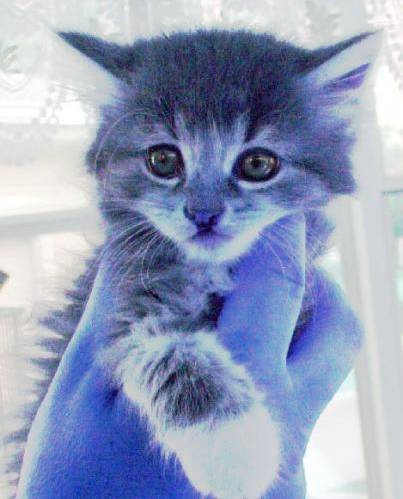

In [125]:
# loading some images
cat_image = '/content/dogs-vs-cats/train/cats/cat.100.jpg'
img = cv2.imread(cat_image)
img

In [126]:
print(img)

[[[220 225 224]
  [219 224 223]
  [219 224 223]
  ...
  [249 242 245]
  [249 242 245]
  [249 242 245]]

 [[218 223 222]
  [218 223 222]
  [219 224 223]
  ...
  [251 245 246]
  [251 244 247]
  [251 244 247]]

 [[216 221 220]
  [217 222 221]
  [217 222 221]
  ...
  [252 246 247]
  [253 247 248]
  [253 247 248]]

 ...

 [[224 214 214]
  [224 217 214]
  [219 214 211]
  ...
  [209 212 217]
  [211 211 217]
  [211 211 217]]

 [[224 215 211]
  [224 218 213]
  [221 215 210]
  ...
  [209 212 217]
  [211 211 217]
  [211 211 217]]

 [[224 215 211]
  [224 218 213]
  [221 215 210]
  ...
  [209 212 217]
  [211 211 217]
  [211 211 217]]]


## model building

In [127]:
base_dir = '/content/dogs-vs-cats/train'

train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)

In [128]:
# Using 20% of data for validation

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resizing images to 150x150
    batch_size=20,
    class_mode='binary',  # Since we use binary crossentropy loss, we need binary labels
    subset='training'  # Set as training data
)

Found 16000 images belonging to 2 classes.


In [129]:
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation',
    shuffle=False  # Disable shuffling for validation data
)

Found 4000 images belonging to 2 classes.


In [130]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [131]:
model = models.Sequential([
    # layer 1
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape =(150,150,3)),
    layers.MaxPooling2D(2,2),

    # layer 2
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),

    # layer 3
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),

    # layer 4
    layers.Conv2D(128, (3,3), activation = 'relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [132]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [133]:
history = model.fit(train_generator, epochs=10, validation_data = validation_generator)

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


800/800 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.5307 - loss: 0.6840 - val_accuracy: 0.7057 - val_loss: 0.5731
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.7209 - loss: 0.5482 - val_accuracy: 0.7815 - val_loss: 0.4696
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.7865 - loss: 0.4490 - val_accuracy: 0.7915 - val_loss: 0.4431
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - accuracy: 0.8360 - loss: 0.3746 - val_accuracy: 0.8290 - val_loss: 0.3768
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.8663 - loss: 0.3103 - val_accuracy: 0.8515 - val_loss: 0.3374
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.8952 - loss: 0.2437 - val_accuracy: 0.8612 - val_loss: 0.3529
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - accuracy: 0.9296 - loss: 0.1748 - val_accuracy: 0.8577 - val_loss: 0.3813
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 33s 41ms/step - accuracy: 0.9528 - loss: 0.1233 - val_accurac

Text(0.5, 1.0, 'Training and Validation Accuracy')

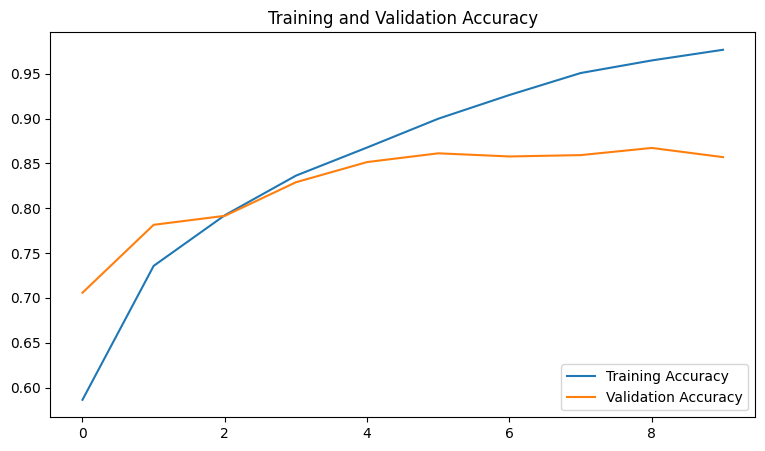

In [134]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


## inference

In [135]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_dir = '/content/dogs-vs-cats/test'

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    shuffle=False
)

Found 5000 images belonging to 2 classes.


In [136]:
# Evaluating the model
test_loss, test_accuracy = model.evaluate(
    test_generator,
    steps=len(test_generator)
)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.8682 - loss: 0.4985
Test Loss: 0.5538519620895386
Test Accuracy: 0.8637999892234802


In [137]:
probabilities = model.predict(test_generator)
probabilities

250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step


array([[1.3786503e-17],
       [1.5644357e-11],
       [3.3042497e-07],
       ...,
       [9.9918395e-01],
       [5.6109005e-01],
       [9.3477112e-01]], dtype=float32)

In [138]:
predicted_classes = (probabilities > 0.5).astype(int).squeeze()
predicted_classes

array([0, 0, 0, ..., 1, 1, 1])

In [139]:
test_generator.class_indices

{'cats': 0, 'dogs': 1}

In [140]:
# If you need the actual class labels instead of 0/1, you can map the predicted classes back to the original labels
class_labels = list(test_generator.class_indices.keys())
predicted_labels = [class_labels[i] for i in predicted_classes]

# Get the true labels from the test generator
true_classes = test_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
cm

array([[2177,  323],
       [ 358, 2142]])

In [141]:
import seaborn as sns

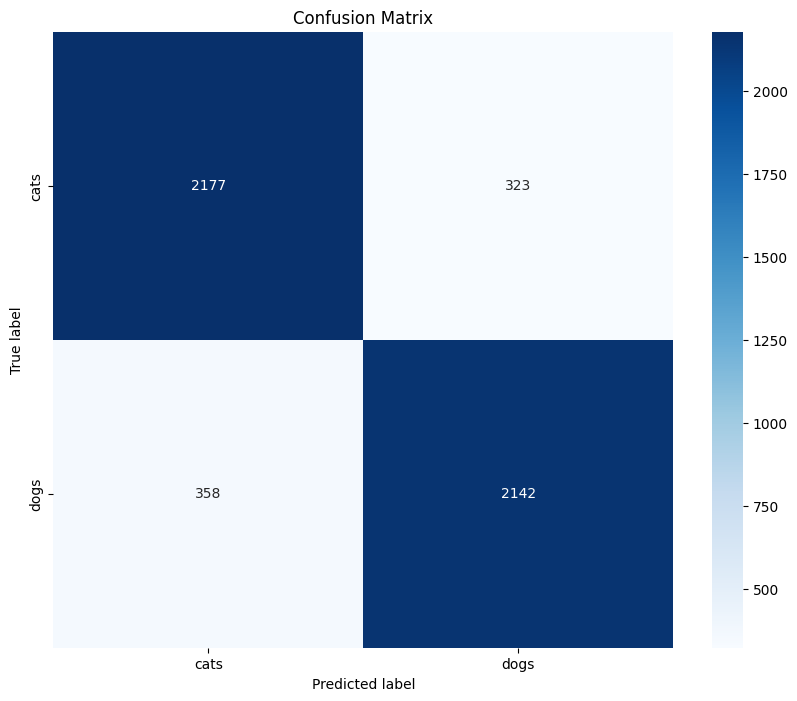

In [142]:
# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_labels,
    yticklabels=class_labels
)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [143]:
test_image = '/content/dogs-vs-cats/test/cats/cat.10000.jpg'

img = load_img(test_image, target_size=(150, 150))  # Resizing the image
img_array = img_to_array(img)
print(img_array.shape)
img_array = np.expand_dims(img_array, axis=0)        # Add batch dimension
img_array /= 255.

img_array.shape


(150, 150, 3)


(1, 150, 150, 3)

In [144]:
model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


array([[1.5644326e-11]], dtype=float32)

In [145]:
def make_prediction(image_path):
    img = load_img(image_path, target_size=(150, 150))  # Resizing the image
    img_array = img_to_array(img)                        # Converting to array
    img_array = np.expand_dims(img_array, axis=0)        # Add batch dimension
    img_array /= 255.                                    # Rescale the image similarly as we did for the training data

    prediction = model.predict(img_array)
    print("Prediction:", prediction)

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Prediction
    plt.subplot(1, 2, 2)
    if prediction[0][0] > 0.5:
        plt.title('Predicted: Dog')
    else:
        plt.title('Predicted: Cat')
    plt.imshow(img)  # Show the same image as prediction
    plt.axis('off')

    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: [[0.9999989]]


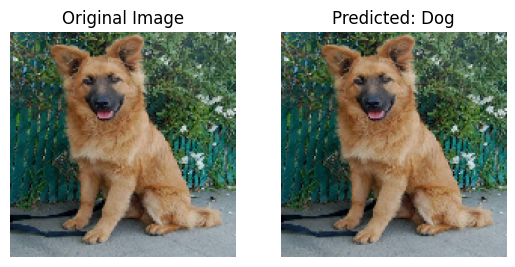

In [146]:
img_path = '/content/dogs-vs-cats/test/dogs/dog.10014.jpg'
make_prediction(img_path)